# AirBnB Reviews Topic Modelling: Nouns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import glob as glob
import csv

## Load Data

In [2]:
def load_review_data(directory):
    """Load Review Data"""
    reviews_df = pd.read_csv(directory + 'interim/review_wrangled.csv', sep=';', lineterminator='\n').drop(columns=['Unnamed: 0'])
    
    return reviews_df

In [3]:
# Select City
country = 'united-states'
city = 'san-francisco'

# Directory
directory = '../data/' + country + '/' + city + '/'

# Load Data
reviews_df = load_review_data(directory)

In [4]:
reviews_sf.head()

,listing_id,neighborhood,comments,tokens,tokens_count,name_entities,name_entities_count,comments_no_ne,no_ne_tokens,no_ne_tokens_count,nouns,nouns_counts,verbs,verbs_counts,adjectives,adjectives_counts
0,958,Western Addition,"Our experience was, without a doubt, a five st...","['experience', 'without', 'doubt', 'five', 'st...",49,"['David', 'Haight', 'Castro', 'Golden Gate Par...",5,"Our experience was, without a doubt, a five st...","['experience', 'without', 'doubt', 'five', 'st...",41,"['experience', 'doubt', 'star', 'experience', ...",30,"[u'be', u'be', 'accomodating', u'honor', u'be'...",10,"['consummate', 'full', 'perfect', 'full', 'clo...",6
1,958,Western Addition,Returning to San Francisco is a rejuvenating t...,"['returning', 'san', 'francisco', 'rejuvenatin...",38,"['San Francisco', 'Holly', 'David']",3,Returning to is a rejuvenating thrill but thi...,"['returning', 'rejuvenating', 'thrill', 'time'...",34,"['san', 'francisco', 'rejuvenating', 'thrill',...",19,"[u'return', u'be', u'be', u'enhance', u'renova...",14,"['great', 'local', 'such', 'amenable']",4
2,958,Western Addition,We were very pleased with the accommodations a...,"['pleased', u'accommodation', 'friendly', 'nei...",71,"['David', 'Haight Street', 'Castro Street']",3,We were very pleased with the accommodations a...,"['pleased', u'accommodation', 'friendly', 'nei...",66,"[u'accommodation', 'neighborhood', 'bed', 'fut...",41,"[u'be', u'be', 'make', u'be', u'have', u'be', ...",21,"['pleased', 'friendly', 'able', 'second', 'hel...",16
3,958,Western Addition,We highly recommend this accomodation and agre...,"['highly', 'recommend', 'accomodation', 'agree...",44,"['David', 'Airbnb']",2,We highly recommend this accomodation and agre...,"['highly', 'recommend', 'accomodation', 'agree...",42,"['accomodation', 'agree', u'posting', 'holly',...",20,"[u'be', u'be', u'be', u'furnish', 'dishwashing...",9,"['previous', 'helpful', 'friendly', 'superb', ...",10
4,958,Western Addition,Holly's place was great. It was exactly what I...,"['holly', ""'s"", 'place', 'great', 'exactly', '...",26,"['Holly', 'San Francisco']",2,'s place was great. It was exactly what I need...,"[""'s"", 'place', 'great', 'exactly', 'needed', ...",23,"['holly', 'place', 'perfect', 'location', 'cle...",10,"[u'be', u'be', u'need', ""'s"", 'make']",5,"['great', 'super', 'little', 'good']",4


## Clean

In [5]:
import ast

reviews_sf['tokens'] = reviews_sf['tokens'].map(lambda x: ast.literal_eval(x))
reviews_sf['name_entities'] = reviews_sf['name_entities'].map(lambda x: ast.literal_eval(x))
reviews_sf['no_ne_tokens'] = reviews_sf['no_ne_tokens'].map(lambda x: ast.literal_eval(x))
reviews_sf['nouns'] = reviews_sf['nouns'].map(lambda x: ast.literal_eval(x))
reviews_sf['verbs'] = reviews_sf['verbs'].map(lambda x: ast.literal_eval(x))
reviews_sf['adjectives'] = reviews_sf['adjectives'].map(lambda x: ast.literal_eval(x))

## EDA

14.659686014323162

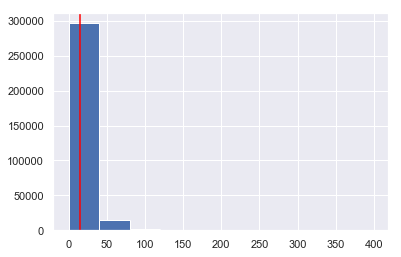

In [7]:
_ = reviews_sf['nouns_counts'].hist()
_ = plt.axvline(np.mean(reviews_sf['nouns_counts']), color='red')
np.mean(reviews_sf['nouns_counts'])

# Topic Modelling

In [10]:
token_texts = list(reviews_sf['nouns'].values)

In [11]:
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
common_dictionary = Dictionary(token_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in token_texts]

In [12]:
from gensim.models.ldamulticore import LdaMulticore
import time
ldam = LdaMulticore

num_topics = 50
num_words = 10
passes = 50

# Get Start Time
start_time = time.time()

# LDA Model
ldam_model = ldam(common_corpus, num_topics=num_topics, id2word=common_dictionary, passes=passes)
model_end_time = time.time() # Model End Time

# LDA Results
results = ldam_model.print_topics(num_topics=num_topics, num_words=num_words)
result_time = time.time() # Results Time

In [22]:
(model_end_time - start_time) / 60 / 60

2.570820320579741

## Save Model

In [14]:
ldam_model.save('../models/ldam_reviews_50topics_10words_50passes_nouns.model')

# Results

In [2]:
def display_results(results):
    for index, results in results:
        print(str(index) + ': ' + str(', '.join(results.split('"')[1::2])))
        
def display_results_no_duplicates(results):
    all_lists = []
    for index, result in results:
        all_lists = all_lists + result.split('"')[1::2]
    
    # Get Counts of each word
    counts = pd.Series(all_lists).value_counts()
    no_duplicates = counts[counts == 1].index
    
    for index, result in results:
        print(str(index) + ': ' + str(', '.join([word for word in result.split('"')[1::2] if word in no_duplicates])))

## Topic Results

In [10]:
display_results(results)

0: apartment, stay, everything, host, location, time, sf, thanks, neighborhood, question
1: place, location, host, sf, stay, everything, clean, time, nice, neighborhood
2: beach, square, union, wharf, building, location, fisherman, car, minute, cable
3: mission, district, castro, heart, park, location, brian, street, dolores, distance
4: space, view, city, hill, neighborhood, host, deck, patio, top, plenty
5: s, tr, le, la, et, bien, d, dans, de, avon
6: photo, mike, flat, amy, tony, communicator, email, thanks, pete, fast
7: shower, water, bed, review, thing, heater, towel, sheet, cleanliness, lock
8: room, bathroom, bed, bedroom, kitchen, living, space, host, area, location
9: studio, work, valley, noe, week, conference, center, brand, hayes, tom
10: unit, check-in, flight, door, luggage, breeze, hour, bag, stair, key
11: michael, t, response, process, question, star, awesome, wa, booking, quick
12: description, will, %, sara, accommodating, wait, superb, self, equipment, china
13: h

In [18]:
display_results_no_duplicates(results)

0: apartment
1: clean, nice
2: square, union, wharf, building, fisherman, cable
3: mission, district, castro, heart, brian, dolores
4: view, hill, deck, patio, top, plenty
5: tr, le, et, bien, d, dans, de, avon
6: photo, mike, flat, amy, tony, communicator, email, pete, fast
7: shower, water, review, heater, sheet, cleanliness, lock
8: bathroom, bedroom, living
9: studio, work, valley, noe, week, conference, center, brand, hayes, tom
10: unit, check-in, flight, door, luggage, breeze, hour, bag, stair, key
11: michael, t, response, process, star, awesome, wa, booking, quick
12: description, will, %, sara, accommodating, wait, superb, self, equipment, china
13: house, kind, beautiful
14: dog, cute, jason, lady, california, bunch, office, coast, haight-ashbury
15: size, anna, sight, hostess, judy, terrace, partner, cost, rachel, notch
16: height, bernal, sarah, apt, bay, middle, term, jenny, hope, lisa
17: san, francisco, michelle, anyone
18: pleasure, cottage, paul, peter, appartment, ma